<div dir='rtl'>
    
# بخش اول

</div>

In [1]:
import tensorflow as tf
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# Helper libraries
import warnings
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

2022-05-20 22:45:51.166389: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-20 22:45:51.166479: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Fix random seed for reproducibility
np.random.seed(7)

<div dir='rtl'>
    
### ۱) آماده سازی دیتاست
<br>
<div dir=rtl>
    دیتاست را با استفاده از کتابخانه ایجاد می کنیم . این دیتاست شامل ۱۰۰۰ نقطه به همراه برچسب می باشد .  
</div>
</div>

In [3]:
points, values = make_circles(n_samples=3000, noise=0.07, factor=0.3)
print(f'point shape : {points.shape} , label shape : {values.shape}')

point shape : (3000, 2) , label shape : (3000,)


<div dir=rtl>
   در این مرحله ۱۰ درصد دیتاست را به عنوان داده های تستی جدا می کنیم .  
</div>

In [4]:
# Splitting test and train
train_points, test_points, train_labels, test_labels = train_test_split(points, values, test_size=0.1)
print(f'train_points shape : {train_points.shape} , train_labels shape : {train_labels.shape}')

train_points shape : (2700, 2) , train_labels shape : (2700,)


<div dir=rtl>
  در این مرحله دیتاست را برای نمایش آماده می کنیم . هر کدام از مجموعه داده ها به رنگ خاصی نسبت داده می شوند.
</div>

In [5]:
# returns the train row where the corresponding label is 0
train_points_0 = [train_points[i, :] for i in range(len(train_labels)) if train_labels[i] == 0]
# returns the train row where the corresponding label is 1
train_points_1 = [train_points[i, :] for i in range(len(train_labels)) if train_labels[i] == 1]
# returns the test row where the corresponding label is 0
test_points_0 = [test_points[i, :] for i in range(len(test_labels)) if test_labels[i] == 0]
# returns the test row where the corresponding label is 1
test_points_1 = [test_points[i, :] for i in range(len(test_labels)) if test_labels[i] == 1]

train_points_0 = np.array(train_points_0)
train_points_1 = np.array(train_points_1)
test_points_0 = np.array(test_points_0)
test_points_1 = np.array(test_points_1)

<div dir='rtl'>
    
### ۲) نمایش دیتاست
</div>

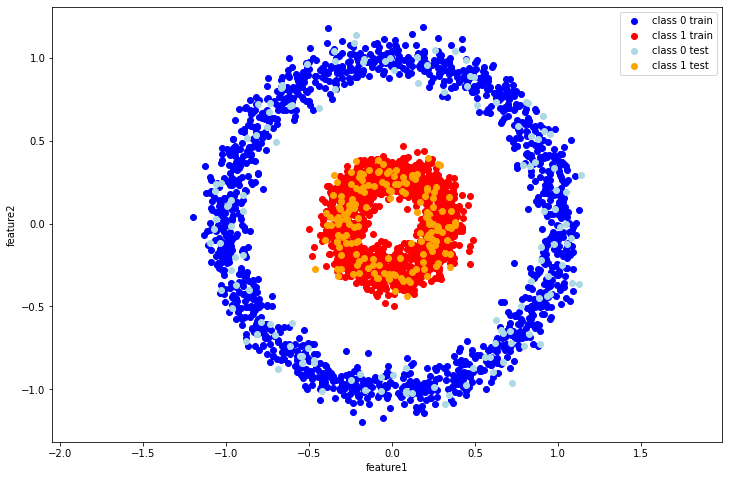

In [6]:
plt.figure(figsize=(12, 8))
plt.scatter(train_points_0[0:, 0], train_points_0[0:, 1], color='b', label='class 0 train')
plt.scatter(train_points_1[0:, 0], train_points_1[0:, 1], color='r', label='class 1 train')
plt.scatter(test_points_0[0:, 0], test_points_0[0:, 1], color='LightBlue', label='class 0 test')
plt.scatter(test_points_1[0:, 0], test_points_1[0:, 1], color='Orange', label='class 1 test')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.axis('equal')
plt.show()

In [7]:
# checking the shape of the input data
print('train_points_0:\t{}' .format(train_points_0.shape))
print('train_points_1:\t{}' .format(train_points_1.shape))
print('test_points_0 :\t{}'.format(test_points_0.shape))
print('test_points_1 :\t{}'.format(test_points_1.shape))

train_points_0:	(1367, 2)
train_points_1:	(1333, 2)
test_points_0 :	(133, 2)
test_points_1 :	(167, 2)


<div dir='rtl'>
    
### ۳) ایجاد شبکه عصبی
<br>
<div dir=rtl>
   تعداد مراحل آموزش و نرخ یادگیری شبکه عصبی را مشخص می کنیم. 
</div>
</div>

In [8]:
# Hyperparameters
training_epochs = 100 # Total number of training epochs
learning_rate = 0.001 # The learning rate

<div dir=rtl>
    در این مرحله یک شبکه عصبی ایجاد می کنیم .  این ورودی این شبکه عصبی دارای ۴ نورون می باشد و یک لایه نهان با ۸ نورون دارد و لایه خروجی داری یک نورون می باشد. در tf.keras، مدل ترتیبی، پشته خطی لایه‌ها را نشان می‌دهد که در لایه‌های متراکم، همه نورون‌های بین لایه‌ها به یکدیگر متصل هستند
    </div>

In [9]:
def create_model():
    model = tf.keras.Sequential()
    # Input layer
    model.add(tf.keras.layers.Dense(8, input_shape=(2,), kernel_initializer='uniform'))
    # Output layer
    model.add(tf.keras.layers.Dense(1))

    model.compile(loss='binary_crossentropy', 
                optimizer=tf.keras.optimizers.Adam(learning_rate), 
                metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


2022-05-20 22:47:29.482593: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-20 22:47:29.482680: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mohammad-HP-Laptop-15-da0xxx): /proc/driver/nvidia/version does not exist
2022-05-20 22:47:29.532588: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<div dir='rtl'>
    
### ۳) آموزش مدل
<br>
<div dir=rtl>
   در این مرحله مدل را آموزش می دهیم .  
</div>
</div>

In [10]:
results = model.fit(train_points, train_labels, 
                    epochs=training_epochs, batch_size=100, validation_split=0.1)

Epoch 1/100
25/25 [==============================] - 1s 14ms/step - loss: 1.9836 - accuracy: 0.5066 - val_loss: 1.4566 - val_accuracy: 0.5037
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 1.3579 - accuracy: 0.5066 - val_loss: 1.2845 - val_accuracy: 0.5037
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 1.2239 - accuracy: 0.5066 - val_loss: 1.1765 - val_accuracy: 0.5037
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 1.1285 - accuracy: 0.5066 - val_loss: 1.0918 - val_accuracy: 0.5037
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 1.0523 - accuracy: 0.5066 - val_loss: 1.0230 - val_accuracy: 0.5037
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.9897 - accuracy: 0.5066 - val_loss: 0.9657 - val_accuracy: 0.5037
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.9375 - accuracy: 0.5066 - val_loss: 0.9174 - val_accuracy: 0.5037
Epoch 8/100


Epoch 59/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.3292 - val_loss: 0.6931 - val_accuracy: 0.3630
Epoch 60/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4753 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 61/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.3963 - val_loss: 0.6930 - val_accuracy: 0.3630
Epoch 62/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4638 - val_loss: 0.6931 - val_accuracy: 0.5037
Epoch 63/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4947 - val_loss: 0.6931 - val_accuracy: 0.4741
Epoch 64/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5045 - val_loss: 0.6932 - val_accuracy: 0.5037
Epoch 65/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4395 - val_loss: 0.6930 - val_accuracy: 0.3889
Epoch 

<div dir=rtl>
  حال داده های آموزشی را روی مدل آموزش دیده بررسی می کنیم .
</div>

In [11]:
prediction_values = model.predict(test_points)

<div dir=rtl>
  همانطور که مشاهده می شود مقدار دقت  حدودا برابر با ۵۰ درصد است.
</div>

In [12]:
print("Test-Accuracy:","%.2f%%" % (np.mean(results.history["val_accuracy"])*100))

Test-Accuracy: 44.75%


<div dir=rtl>
  در این قسمت تاریخچه دقت روی نمودار نمایش داده شده است
</div>

Text(0.5, 1.0, 'model accuracy')

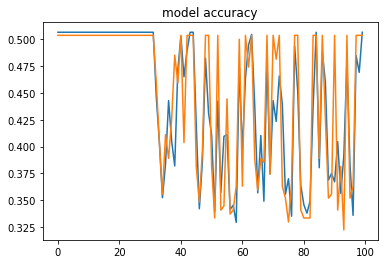

In [13]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')

###### نمودار خطا

Maximum Loss : 1.9836

Minimum Loss : 0.6931

Loss difference : 1.2906


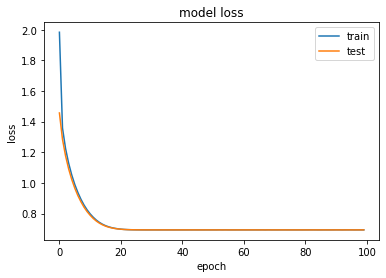

In [14]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

<div dir='rtl'>
    
#### سوال اول 

<br>
<div dir='rtl'>    
در مراحل بالا تابع فعال سازی استفاده نشده بود و می دانیم در این حالت در واقع همان تابع فعال ساز خطی است.</div>

    
</div>

In [15]:
def create_model():
    model = tf.keras.Sequential()
    # Input layer
    model.add(tf.keras.layers.Dense(8, input_shape=(2,), kernel_initializer='uniform', activation='linear'))
    # Output layer
    model.add(tf.keras.layers.Dense(1, activation='linear'))

    model.compile(loss='binary_crossentropy', 
                optimizer=tf.keras.optimizers.Adam(learning_rate), 
                metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 24        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [16]:
results = model.fit(train_points, train_labels, 
                    epochs=training_epochs, batch_size=100, validation_split=0.1)

Epoch 1/100
25/25 [==============================] - 1s 9ms/step - loss: 1.9802 - accuracy: 0.5066 - val_loss: 1.3301 - val_accuracy: 0.5037
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 1.2354 - accuracy: 0.5066 - val_loss: 1.1647 - val_accuracy: 0.5037
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 1.1110 - accuracy: 0.5066 - val_loss: 1.0657 - val_accuracy: 0.5037
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 1.0252 - accuracy: 0.5066 - val_loss: 0.9923 - val_accuracy: 0.5037
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.9582 - accuracy: 0.5066 - val_loss: 0.9327 - val_accuracy: 0.5037
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.9047 - accuracy: 0.5066 - val_loss: 0.8840 - val_accuracy: 0.5037
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.8604 - accuracy: 0.5066 - val_loss: 0.8435 - val_accuracy: 0.5037
Epoch 8/100
2

Epoch 59/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.3387 - val_loss: 0.6930 - val_accuracy: 0.3111
Epoch 60/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.3276 - val_loss: 0.6930 - val_accuracy: 0.3259
Epoch 61/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4449 - val_loss: 0.6931 - val_accuracy: 0.5037
Epoch 62/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.4058 - val_loss: 0.6931 - val_accuracy: 0.3963
Epoch 63/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4811 - val_loss: 0.6931 - val_accuracy: 0.5037
Epoch 64/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.3889 - val_loss: 0.6931 - val_accuracy: 0.3778
Epoch 65/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.3428 - val_loss: 0.6930 - val_accuracy: 0.3333
Epoch 

In [17]:
prediction_values = model.predict(test_points)

<div dir=rtl>
  همانطور که مشاهده می شود مقدار دقت  حدودا برابر با ۵۰ درصد است.
</div>

In [18]:
print("Test-Accuracy:","%.2f%%" % (np.mean(results.history["val_accuracy"])*100))

Test-Accuracy: 44.09%


<div dir=rtl>
  در این قسمت تاریخچه دقت روی نمودار نمایش داده شده است
</div>

Text(0.5, 1.0, 'model accuracy')

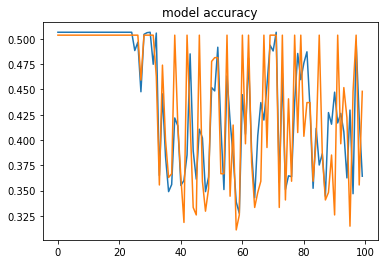

In [19]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')

Maximum Loss : 1.9802

Minimum Loss : 0.6931

Loss difference : 1.2871


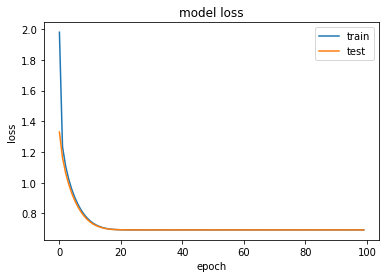

In [20]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

<div dir='rtl'>
    
#### سوال دوم 

<br>
<div dir='rtl'>    
در مراحل بالا از تابع فعال ساز خطی استفاده شده است و مشاهده می شود که نتایج با حالتی که از هیچ تابع فعال سازی استفاده نشده است مشابه است ..</div>

    
</div>

<div dir='rtl'>
این بار برای تابع خطا از mse که مناسب رگرسیون خطی است استفاده میکنیم.
همانطور که از نمودار صحت و خطا مشخص است، در این حالت نیز مدل عملکرد خوبی ندارد.
    
</div>

In [21]:
def create_model():
    model = tf.keras.Sequential()
    # Input layer
    model.add(tf.keras.layers.Dense(8, input_shape=(2,), kernel_initializer='uniform', activation='linear'))
    # Output layer
    model.add(tf.keras.layers.Dense(1, activation='linear'))

    model.compile(loss='mse', 
                optimizer=tf.keras.optimizers.Adam(learning_rate), 
                metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 24        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [22]:
results = model.fit(train_points, train_labels, 
                    epochs=training_epochs, batch_size=100, validation_split=0.1)

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 0.4496 - accuracy: 0.5066 - val_loss: 0.4057 - val_accuracy: 0.5037
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.3681 - accuracy: 0.5066 - val_loss: 0.3335 - val_accuracy: 0.5037
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3072 - accuracy: 0.5066 - val_loss: 0.2852 - val_accuracy: 0.5037
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2711 - accuracy: 0.5066 - val_loss: 0.2606 - val_accuracy: 0.5037
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2557 - accuracy: 0.5066 - val_loss: 0.2521 - val_accuracy: 0.5037
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2512 - accuracy: 0.5066 - val_loss: 0.2502 - val_accuracy: 0.5037
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2501 - accuracy: 0.4691 - val_loss: 0.2500 - val_accuracy: 0.3704
Epoch 8/100


Epoch 59/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2501 - accuracy: 0.5066 - val_loss: 0.2501 - val_accuracy: 0.5037
Epoch 60/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2500 - accuracy: 0.4580 - val_loss: 0.2500 - val_accuracy: 0.3556
Epoch 61/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2503 - accuracy: 0.5313 - val_loss: 0.2500 - val_accuracy: 0.6630
Epoch 62/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2501 - accuracy: 0.4955 - val_loss: 0.2500 - val_accuracy: 0.5037
Epoch 63/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2501 - accuracy: 0.4840 - val_loss: 0.2500 - val_accuracy: 0.4704
Epoch 64/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2502 - accuracy: 0.4498 - val_loss: 0.2500 - val_accuracy: 0.5037
Epoch 65/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2502 - accuracy: 0.5539 - val_loss: 0.2500 - val_accuracy: 0.4778
Epoch 

In [23]:
prediction_values = model.predict(test_points)
print("Test-Accuracy:","%.2f%%" % (np.mean(results.history["val_accuracy"])*100))

Test-Accuracy: 44.43%


<div dir=rtl >
    همانطور که مشاهده می شود زمانی که تابع خطا را یک تابع خطای رگرسیونی گرفتیم تفاوتی ایجاد نشد. چون مدل ما همچنان یک مدل خطی می باشد. .
    
    در ادامه از یک لایه استفاده می کنیم .
</div>

In [24]:
def create_model():
    model = tf.keras.Sequential()
    # Input layer
    model.add(tf.keras.layers.Dense(1, input_shape=(2,), kernel_initializer='uniform', activation='linear'))
    # Output layer
#     model.add(tf.keras.layers.Dense(1, activation='linear'))

    model.compile(loss='binary_crossentropy', 
                optimizer=tf.keras.optimizers.Adam(learning_rate), 
                metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [25]:
results = model.fit(train_points, train_labels, 
                    epochs=training_epochs, batch_size=100, validation_split=0.1)

Epoch 1/100
25/25 [==============================] - 1s 9ms/step - loss: 2.7936 - accuracy: 0.5066 - val_loss: 2.2825 - val_accuracy: 0.5037
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 2.2064 - accuracy: 0.5066 - val_loss: 2.1605 - val_accuracy: 0.5037
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 2.1131 - accuracy: 0.5066 - val_loss: 2.0844 - val_accuracy: 0.5037
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 2.0426 - accuracy: 0.5066 - val_loss: 2.0195 - val_accuracy: 0.5037
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 1.9821 - accuracy: 0.5066 - val_loss: 1.9622 - val_accuracy: 0.5037
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 1.9286 - accuracy: 0.5066 - val_loss: 1.9126 - val_accuracy: 0.5037
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 1.8814 - accuracy: 0.5066 - val_loss: 1.8683 - val_accuracy: 0.5037
Epoch 8/100
2

Epoch 59/100
25/25 [==============================] - 0s 3ms/step - loss: 1.1420 - accuracy: 0.5066 - val_loss: 1.1455 - val_accuracy: 0.5037
Epoch 60/100
25/25 [==============================] - 0s 3ms/step - loss: 1.1360 - accuracy: 0.5066 - val_loss: 1.1393 - val_accuracy: 0.5037
Epoch 61/100
25/25 [==============================] - 0s 3ms/step - loss: 1.1300 - accuracy: 0.5066 - val_loss: 1.1334 - val_accuracy: 0.5037
Epoch 62/100
25/25 [==============================] - 0s 3ms/step - loss: 1.1242 - accuracy: 0.5066 - val_loss: 1.1276 - val_accuracy: 0.5037
Epoch 63/100
25/25 [==============================] - 0s 3ms/step - loss: 1.1185 - accuracy: 0.5066 - val_loss: 1.1219 - val_accuracy: 0.5037
Epoch 64/100
25/25 [==============================] - 0s 3ms/step - loss: 1.1128 - accuracy: 0.5066 - val_loss: 1.1163 - val_accuracy: 0.5037
Epoch 65/100
25/25 [==============================] - 0s 3ms/step - loss: 1.1073 - accuracy: 0.5066 - val_loss: 1.1107 - val_accuracy: 0.5037
Epoch 

Text(0.5, 1.0, 'model accuracy')

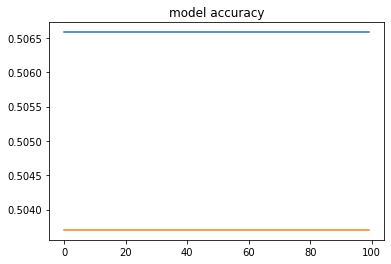

In [26]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')

<div dir=rtl >
    تغییرات روی نرخ یادگیری در حالتی که تابع فعال ساز خطی است تغییرات محسوس روی دقت نمی گذارد.
    
    
##### نرخ یادگیری ۰.۰۰۱ بهترین دقت حاصل می شود
    
</div>

In [41]:
def create_model():
    model = tf.keras.Sequential()
    # Input layer
    model.add(tf.keras.layers.Dense(8, input_shape=(2,), kernel_initializer='uniform', activation='relu'))
    # Output layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', 
                optimizer=tf.keras.optimizers.Adam(learning_rate), 
                metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 8)                 24        
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [42]:
results = model.fit(train_points, train_labels, 
                    epochs=training_epochs, batch_size=100, validation_split=0.1)

Epoch 1/100
25/25 [==============================] - 1s 9ms/step - loss: 0.6896 - accuracy: 0.5173 - val_loss: 0.6861 - val_accuracy: 0.5444
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6839 - accuracy: 0.5305 - val_loss: 0.6813 - val_accuracy: 0.5037
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6787 - accuracy: 0.5078 - val_loss: 0.6759 - val_accuracy: 0.5037
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6727 - accuracy: 0.5144 - val_loss: 0.6695 - val_accuracy: 0.5148
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6657 - accuracy: 0.5325 - val_loss: 0.6623 - val_accuracy: 0.5444
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6580 - accuracy: 0.5354 - val_loss: 0.6543 - val_accuracy: 0.5519
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6494 - accuracy: 0.6099 - val_loss: 0.6455 - val_accuracy: 0.6444
Epoch 8/100
2

Epoch 59/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1163 - accuracy: 1.0000 - val_loss: 0.1165 - val_accuracy: 1.0000
Epoch 60/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1124 - accuracy: 1.0000 - val_loss: 0.1127 - val_accuracy: 1.0000
Epoch 61/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1087 - accuracy: 1.0000 - val_loss: 0.1091 - val_accuracy: 1.0000
Epoch 62/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1052 - accuracy: 1.0000 - val_loss: 0.1056 - val_accuracy: 1.0000
Epoch 63/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1018 - accuracy: 1.0000 - val_loss: 0.1023 - val_accuracy: 1.0000
Epoch 64/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0985 - accuracy: 1.0000 - val_loss: 0.0990 - val_accuracy: 1.0000
Epoch 65/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0954 - accuracy: 1.0000 - val_loss: 0.0960 - val_accuracy: 1.0000
Epoch 

In [43]:
prediction_values = model.predict(test_points)
print("Test-Accuracy:","%.2f%%" % (np.mean(results.history["val_accuracy"])*100))

Test-Accuracy: 95.74%


Text(0.5, 1.0, 'model accuracy')

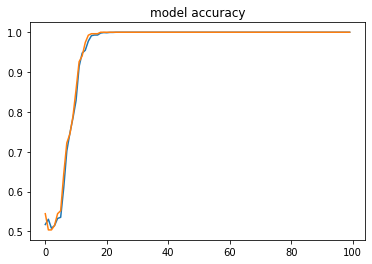

In [44]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')

Maximum Loss : 0.6896

Minimum Loss : 0.0363

Loss difference : 0.6533


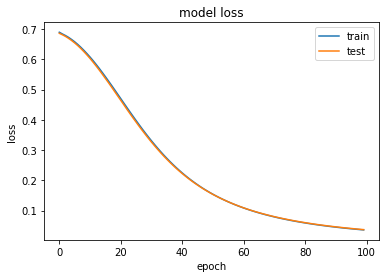

In [45]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

<div dir=rtl >
    در این مرحله نرخ یادگیری را ۰.۰۰۳ و از تابع فعال ساز رلو استفاده می کنیم .
</div>

In [46]:
def create_model():
    model = tf.keras.Sequential()
    # Input layer
    model.add(tf.keras.layers.Dense(8, input_shape=(2,), kernel_initializer='uniform', activation='relu'))
    # Output layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', 
                optimizer = tf.keras.optimizers.SGD(learning_rate=0.003), 
                metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 8)                 24        
                                                                 
 dense_16 (Dense)            (None, 1)                 9         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [47]:
results = model.fit(train_points, train_labels, 
                    epochs=training_epochs, batch_size=100, validation_split=0.1)

Epoch 1/100
25/25 [==============================] - 1s 9ms/step - loss: 0.6952 - accuracy: 0.4827 - val_loss: 0.6950 - val_accuracy: 0.4519
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.3724 - val_loss: 0.6947 - val_accuracy: 0.3630
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6947 - accuracy: 0.3165 - val_loss: 0.6945 - val_accuracy: 0.2074
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.2189 - val_loss: 0.6942 - val_accuracy: 0.1963
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.2753 - val_loss: 0.6938 - val_accuracy: 0.3148
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.3457 - val_loss: 0.6934 - val_accuracy: 0.4778
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5012 - val_loss: 0.6930 - val_accuracy: 0.5037
Epoch 8/100
2

Epoch 59/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6874 - accuracy: 0.5066 - val_loss: 0.6877 - val_accuracy: 0.5037
Epoch 60/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6873 - accuracy: 0.5066 - val_loss: 0.6876 - val_accuracy: 0.5037
Epoch 61/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6872 - accuracy: 0.5066 - val_loss: 0.6876 - val_accuracy: 0.5037
Epoch 62/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.5066 - val_loss: 0.6875 - val_accuracy: 0.5037
Epoch 63/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6871 - accuracy: 0.5066 - val_loss: 0.6874 - val_accuracy: 0.5037
Epoch 64/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.5066 - val_loss: 0.6873 - val_accuracy: 0.5037
Epoch 65/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6869 - accuracy: 0.5066 - val_loss: 0.6873 - val_accuracy: 0.5037
Epoch 

In [48]:
prediction_values = model.predict(test_points)
print("Test-Accuracy:","%.2f%%" % (np.mean(results.history["val_accuracy"])*100))

Test-Accuracy: 49.84%


Text(0.5, 1.0, 'model accuracy')

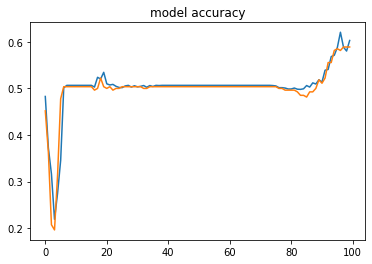

In [49]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')

Maximum Loss : 0.6952

Minimum Loss : 0.6839

Loss difference : 0.0113


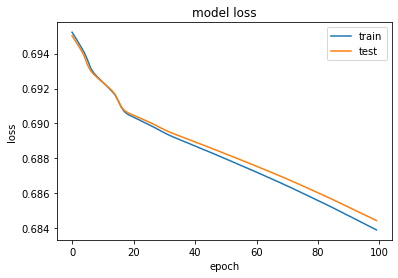

In [50]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

<div dir=rtl >
در حالت بالا نرخ یادگیری ۰.۰۳ می باشد و مشاهده می شود که نتیجه خوبی حاصل نشده است .
همانطور که مشاهده می شود در حالتی که نرخ یادگیری ۰.۰۰۱ و استفاده از تابع فعال ساز رلو و در لایه آخر سیگمویید نتیجه بهتری حاصل می شود. 
</div>